<a href="https://colab.research.google.com/github/zamoravm1/Fundamentos_Procesamiento_Lenguaje-_Natural_con_Python_y_NLTK/blob/master/code_class_7to.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clase 7: estadisticas básicas del lenguaje**

# **Configuración inicial**

In [2]:
#Libros en inglés en formato de texto tokenizado
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Analizando texto

In [3]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [4]:
text1.tokens[:10]


['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [5]:
print(len(text1))

260819


**Medida de riqueza lexica de tecto **(Rl=palabras unicas/total palabras)


In [6]:
#Construimos un vocabulario (identificamos palabras unicas en el libro)
#https://ellibrodepython.com/sets-python#:~:text=Los%20set%20en%20Python%20son,no%20puede%20haber%20elementos%20duplicados.
#con sort convertimos de el set que está en formato diccionario a formato lista
vocabulario=sorted(set(text1))
print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [7]:
rl= len(vocabulario)/len(text1)
print(rl)

0.07406285585022564


In [8]:
def riqueza_lexica(texto):
  vocabulario =sorted(set(text1))
  return len(vocabulario)/len(texto)
  
riqueza_lexica(text1)

0.07406285585022564

In [9]:
def porcentaje_palabra(palabra,texto):
  return 100*texto.count(palabra)/len(texto)

porcentaje_palabra("monster",text1)

0.018786974875296663


# **Clase 8: Distribuciones de frecuencia de palabras en un texto**


In [10]:
#construir un diccionario donde las llaves sean las palabras 
#y los valores sean las frecuencias
#este método es muy pesado, no recomendado
dic = {}
for palabra in set(text1):
  dic[palabra]=text1.count(palabra)
dic

{'hats': 4,
 'stubble': 1,
 'remonstrate': 1,
 'conspicuous': 7,
 'Lackaday': 1,
 'latent': 4,
 'shipmate': 11,
 'catarrhs': 1,
 'quaffed': 1,
 'collated': 1,
 'why': 71,
 'And': 369,
 'liquid': 2,
 'inexorable': 2,
 'burnished': 1,
 'swarmed': 1,
 'ober': 1,
 'snored': 1,
 'no': 484,
 'started': 26,
 'helmeted': 3,
 'ill': 19,
 'shinbones': 2,
 'analytic': 1,
 'comprises': 3,
 'butchering': 1,
 '59': 1,
 'heeling': 1,
 'slides': 3,
 'trampled': 1,
 'stones': 3,
 'retraced': 1,
 'pulverize': 2,
 'sonorous': 1,
 'busts': 1,
 'BRACE': 1,
 'buoyancy': 4,
 'marbles': 3,
 'Upper': 1,
 'sinewing': 1,
 'oblong': 3,
 'Surmises': 1,
 'leaks': 4,
 'sluggish': 2,
 'effulgences': 2,
 'rattling': 4,
 'Lama': 1,
 'transplanted': 2,
 'wad': 4,
 'waving': 5,
 'respectful': 2,
 'oblique': 3,
 'solemnly': 8,
 'caravan': 2,
 'thumbs': 1,
 'soundest': 2,
 'Krusenstern': 2,
 'sloop': 4,
 'sheaved': 2,
 'situated': 1,
 'lawyer': 2,
 'respect': 16,
 'goodness': 5,
 'recumbent': 2,
 'manage': 2,
 'tarpaulins'

## **Método FreqDist de NLTK**

In [11]:
fdist=FreqDist(text1)

In [12]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

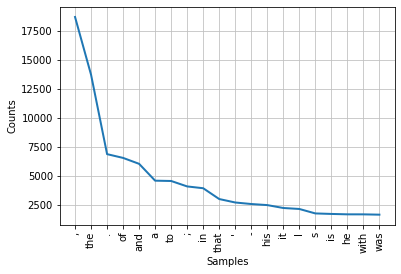

In [13]:
fdist.plot(20)

In [14]:
fdist['monster']

49

## **Distribuciones sobre contenido con filtro-fino**

Los tokens más frecuentes no son necesariamente las palabras que más información nos arrojan.

Por eso vamos a filtrar. No se consideran los signos de puntuación o caracteres especiales.

In [15]:
# lo_que_quiero_usar_en_cada_iteracion for variable_que_almacena la iteracion in elemento_iterable
long_words =[palabra for palabra in text1 if len(palabra)>5]
# elementos unicos en orden alfabetico
vocabulario_filtrado =sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos ahora construir una lista de tuplas, basados en los conteos ya precalculados de la función FreDist. De este estilo
fdist_filtrado= [{'account',2},{'additional',32},{'palabra_en_el_texto',frecuencia_palabra_en_el_texto}]

In [ ]:
palabras_interesantes =[(palabra,fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
#lo convierto a un objeto de la libreria numpy, para manejarlo eficiente
#los dtypes le dice a numpy como interpretar lo que va a leer, string e int
dtypes=[('word','S10'),('frecuency',int)]
palabras_interesantes=np.array(palabras_interesantes, dtype = dtypes)


In [ ]:
#ordenar los elementos de una lista
palabras_interesantes = np.sort(palabras_interesantes, order = 'frecuency')
palabras_interesantes

## **Construcción de un gráfico de barras con Matplotlib**

https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py


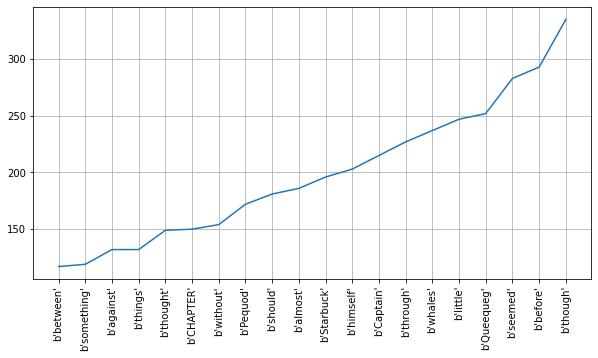

In [28]:
top_words = 20
#creamos un arreglo que corresponde a la longitud de la pa
# devuelve las última top_words -> palabras_interesantes [-top_words:]
x=np.arange(top_words)
#guardamos sólo las frecuencias, elemento 1. el elemento 0 es la palabra
y=[freq[1] for freq in palabras_interesantes[-top_words:]]
plt.figure(figsize = (10,5))
plt.plot(x,y)
#configurar las etiquetas
plt.xticks(x,[str(freq[0]) for freq in palabras_interesantes[-top_words:]],rotation ='vertical')
plt.grid(True)
plt.show()

In [25]:
top_words = 20
len(palabras_interesantes [-top_words:])
x=np.arange(len(palabras_interesantes [-top_words:]))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])